In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lxml import html
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
df=pd.read_csv('C:\\Users\\yashg\\Documents\\Projects\\Hackathon_102021\\alllinks.csv')

In [3]:
df1=df[df['Link'].str.contains("https://thecolumn.co/daily/",na=False)].sort_values(by='Link')
df1=df1[~df1['Link'].str.contains("facebook",na=False)]
df1=df1[~df1['Link'].str.contains("body",na=False)]

In [4]:
df1.to_csv('C:\\Users\\yashg\\Documents\\Projects\\Hackathon_102021\\columndates.csv')

In [5]:
links=df1['Link'].unique()
links=[x for x in links if len(x)<40]
dats=[m[-8:] for m in links]

In [7]:
page = requests.get(links[0],headers={"User-Agent": "XY"})
tree = html.fromstring(page.content)

In [8]:
for i,l in enumerate(links):
    try:
        page = requests.get(l,headers={"User-Agent": "XY"})
        tree = html.fromstring(page.content)
        # Do something with that html
        print(f'{i} was successful')
    except:
        print(f'{i}:{l} was invalid')
    if i>3:
        break

0 was successful
1 was successful
2 was successful
3 was successful
4 was successful


In [9]:
page = requests.get(l,headers={"User-Agent": "XY"}).text
soup = BeautifulSoup(page, 'html.parser')

In [10]:
# https://stackoverflow.com/questions/328356/extracting-text-from-html-file-using-python?page=1&tab=votes#tab-top
for script in soup(["script", "style"]):
    script.extract()
text = soup.get_text()
lines = (line.strip() for line in text.splitlines())
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
text = '\n'.join(chunk for chunk in chunks if chunk)

In [11]:
# https://www.mygreatlearning.com/blog/bag-of-words/
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
CountVec = CountVectorizer(ngram_range=(1,1),stop_words='english') # to use bigrams ngram_range=(2,2)
Count_data = CountVec.fit_transform([text])
cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
d1=cv_dataframe.T.sort_values(by=0,ascending=False)

In [12]:
df=pd.DataFrame()
lprim=[]
for i,l in enumerate(links):
    if i%10==0:
        print(f'{i} of {len(links)}')
    try:
        lprim.append(dats[i])
        page = requests.get(l,headers={"User-Agent": "XY"}).text
        soup = BeautifulSoup(page, 'html.parser')
        for script in soup(["script", "style"]):
            script.extract()
        text = soup.get_text()
        lines = (line.strip() for line in text.splitlines())
        chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
        text = '\n'.join(chunk for chunk in chunks if chunk)
        CountVec = CountVectorizer(ngram_range=(1,1),stop_words='english') # to use bigrams ngram_range=(2,2)
        Count_data = CountVec.fit_transform([text])
        cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
        if i==0:
            d1=cv_dataframe.T.sort_values(by=0,ascending=False)
            d1.columns=[dats[i]]
            merged=d1
        else:
            d2=cv_dataframe.T.sort_values(by=0,ascending=False)
            merged = pd.merge(left=merged, left_index=True,right=d2, right_index=True,how='outer')
            merged.columns=lprim
    except:
        1

0 of 258
10 of 258
20 of 258
30 of 258
40 of 258
50 of 258
60 of 258
70 of 258
80 of 258
90 of 258
100 of 258
110 of 258
120 of 258
130 of 258
140 of 258
150 of 258
160 of 258
170 of 258
180 of 258
190 of 258
200 of 258
210 of 258
220 of 258
230 of 258
240 of 258
250 of 258


In [13]:
merged.to_csv('C:\\Users\\yashg\\Documents\\Projects\\Hackathon_102021\\merged.csv')

In [11]:
summary=pd.read_csv('C:\\Users\\yashg\\Documents\\Projects\\Hackathon_102021\\summary_2.csv')

In [12]:
summary['Dats']=summary['Date/Time'].apply(lambda x: x.split(' ')[0].translate({ord('-'): None}))
summary['Date']=summary['Dats'].apply(lambda x: x[4:]+x[:4])

In [13]:
summary2=summary.sort_values(by=['Open Rate'],ascending=False)

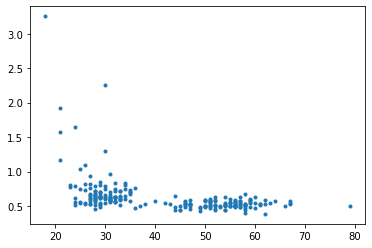

In [15]:
plt.plot(summary2['Link Count'],summary2['Open Rate'],'.')

In [16]:
summary2.columns

Index(['Unnamed: 0', 'Date/Time', 'Duration', 'Sends', 'Opens', 'Clicks',
       'Open Rate', 'Click Rate', 'Unsubscribes', 'Word Count', 'Link Count',
       'Day', 'hour', 'Weekday', 'Dats', 'Date'],
      dtype='object')

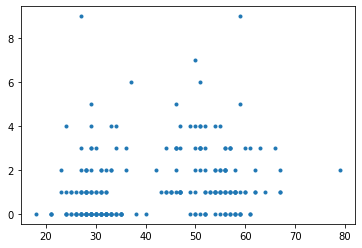

In [17]:
plt.plot(summary2['Link Count'],summary2['Unsubscribes'],'.')

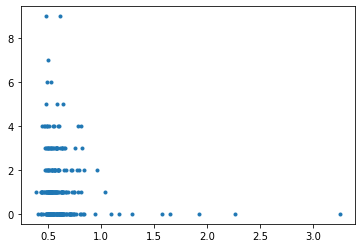

In [18]:
plt.plot(summary2['Open Rate'],summary2['Unsubscribes'],'.')

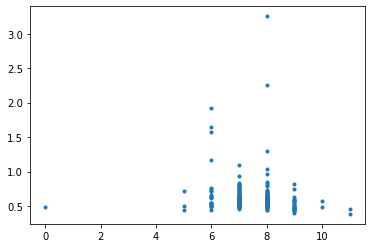

In [19]:
plt.plot(summary2['hour'],summary2['Open Rate'],'.')

In [20]:
# Consider only open rate above 1.0
summary_cut=summary2[summary2['Open Rate']>1.0]

In [21]:
# Find top 'n' words in an article with most open rate (above 1.0)
# Do this with least open rate? - Customize?
df_top=pd.DataFrame()
topn=10
for i,x in enumerate(summary_cut['Date']):
    print(x,',',summary_cut['Open Rate'].iloc[i])
    df_top[summary_cut['Open Rate'].iloc[i]]=merged[x].sort_values(ascending=False).iloc[:topn].astype(int).index
    print(merged[x].sort_values(ascending=False).iloc[:topn].astype(int))
    print('----')

07242020 , 3.253
air               11
energy             9
tax                7
storage            6
plastic            5
uae                4
company            4
jv                 4
liquide            4
infrastructure     4
Name: 07242020, dtype: int32
----
11252020 , 2.2623
ammonia      9
sasol        7
koch         6
ineos        6
solvay       6
hdpe         5
plant        5
chemicals    5
venture      4
sale         4
Name: 11252020, dtype: int32
----
07212020 , 1.9189
celanese    9
oil         8
chevron     8
dow         7
water       7
billion     7
energy      4
nigeria     4
based       4
plastic     4
Name: 07212020, dtype: int32
----
07232020 , 1.6463
technology        12
pp                 7
lyondellbasell     7
gas                5
evonik             5
read               5
new                5
plant              5
power              5
austin             4
Name: 07232020, dtype: int32
----
07222020 , 1.5769
china        11
hydrogen     11
iran          8
linde         6
a

In [22]:
df_bottom=pd.DataFrame()
topn=10
summary_low=summary2.iloc[-topn:]
for i,x in enumerate(summary_low['Date']):
#    print(x,',',summary_low['Open Rate'].iloc[i])
    df_bottom[summary_low['Open Rate'].iloc[i]]=merged[x].sort_values(ascending=False).iloc[:topn].astype(int).index
#    print(merged[x].sort_values(ascending=False).iloc[:topn].astype(int))
#    print('----')

In [23]:
df_top

,3.2530,2.2623,1.9189,1.6463,1.5769,1.2942,1.1724,1.0917,1.0332
0,air,ammonia,celanese,technology,china,plant,gas,rng,basf
1,energy,sasol,oil,pp,hydrogen,new,ethylene,million,emissions
2,tax,koch,chevron,lyondellbasell,iran,pp,oil,release,air
3,storage,ineos,dow,gas,linde,battery,poland,new,technipfmc
4,plastic,solvay,water,evonik,agreement,year,day,sustainability,liquide
5,uae,hdpe,billion,read,gas,recycling,company,lyondellbasell,technology
6,company,plant,energy,new,oil,cycle,perfect,goals,data
7,jv,chemicals,nigeria,plant,membrane,li,fermentation,company,chemicals
8,liquide,venture,based,power,refining,000,price,based,oil
9,infrastructure,sale,plastic,austin,industry,lyondellbasell,based,chevron,sasol


In [24]:
df_bottom[df_bottom.columns[::-1]]

,0.3852,0.4024,0.4323,0.4353,0.4376,0.4377,0.4394,0.4429,0.4437,0.4482
0,hydrogen,million,chemical,company,oil,gas,chemical,chemical,used,carbon
1,produced,shell,fuel,lithium,soybean,company,brenntag,make,agilyx,urea
2,air,plastic,ethanol,hexion,refinery,liquide,used,plastic,hair,lanxess
3,business,business,plastic,nouryon,year,cyclopentanone,company,neste,make,new
4,products,rubber,recycling,plant,66,sibur,make,lubrizol,eha,avantium
5,phenol,refinery,oil,year,plant,air,sulfur,companies,chemical,jv
6,ascend,chemical,sale,based,phillips,methanol,syringes,renewable,cumene,resin
7,used,meg,cells,chemical,marathon,sinopec,pp,based,company,clean
8,read,company,lubrizol,tbhp,hydrogen,asda,basf,lyondellbasell,production,acid
9,eastman,synthetic,alcohol,new,peroxide,solvay,release,eo,chemicals,used


In [25]:
df_all=pd.DataFrame()
for i,x in enumerate(summary2['Date']):
#    print(x,',',summary_low['Open Rate'].iloc[i])
    df_all[summary2['Open Rate'].iloc[i]]=merged[x].sort_values(ascending=False).iloc[:topn].astype(int).index
#    print(merged[x].sort_values(ascending=False).iloc[:topn].astype(int))
#    print('----')

In [26]:
df_all.to_csv('C:\\Users\\yashg\\Documents\\Projects\\Hackathon_102021\\top10.csv')

In [28]:
#Clickrate

In [32]:
summary3=summary2.sort_values(by=['Click Rate'],ascending=False)

In [33]:
df_all2=pd.DataFrame()
for i,x in enumerate(summary3['Date']):
#    print(x,',',summary_low['Open Rate'].iloc[i])
    df_all2[summary3['Click Rate'].iloc[i]]=merged[x].sort_values(ascending=False).iloc[:topn].astype(int).index
#    print(merged[x].sort_values(ascending=False).iloc[:topn].astype(int))
#    print('----')
df_all2.to_csv('C:\\Users\\yashg\\Documents\\Projects\\Hackathon_102021\\top10_clickrate.csv')

In [34]:
df_all2

,0.9562,0.8592,0.8136,0.6985,0.6696,0.6667,0.6664,0.6617,0.6606,0.6531,...,0.0587,0.0580,0.0573,0.0556,0.0553,0.0519,0.0484,0.0473,0.0461,0.0366
0,recycling,million,plastic,new,hydrogen,used,adhesives,company,chemical,plant,...,electrolyte,ammonia,oil,air,plant,technology,production,new,lonza,gas
1,chemical,shell,technology,lithium,company,agilyx,based,evonik,fuel,fuel,...,carbon,sasol,company,energy,new,pp,oil,recycling,sabic,mca
2,make,plastic,avient,make,south,hair,dupont,utility,ethanol,cumene,...,release,koch,oxy,tax,pp,lyondellbasell,material,oil,capsules,salt
3,plastic,business,plastics,recycling,linde,make,arkema,pole,plastic,acid,...,alpla,ineos,zero,storage,battery,gas,hitachi,advanced,preem,borealis
4,acid,rubber,mura,renewable,chemical,eha,company,world,recycling,company,...,production,solvay,net,plastic,year,evonik,like,plastic,circular,cavern
5,plant,refinery,company,66,lotte,chemical,rubber,chemical,oil,chemical,...,butane,hdpe,car,uae,recycling,read,saudi,site,conversion,landfill
6,company,chemical,chevron,produce,eo,cumene,isobutene,lyondellbasell,sale,lactic,...,press,plant,gas,company,cycle,new,arthur,neste,certified,naphtha
7,oil,meg,ve,technology,borealis,company,like,companies,cells,corbion,...,neutral,chemicals,hydrogen,jv,li,plant,port,additives,company,000
8,basf,company,release,liquid,tons,production,caprolactam,used,lubrizol,sabic,...,plant,venture,bmw,liquide,000,power,plant,plastics,renewable,renewable
9,little,synthetic,press,cycle,ethylene,chemicals,adhesive,scale,alcohol,energy,...,company,sale,natural,infrastructure,lyondellbasell,austin,read,naantali,refinery,new


In [35]:
summary4=summary2.sort_values(by=['Unsubscribes'],ascending=False)

In [49]:
df_all3=pd.DataFrame()
for i,x in enumerate(summary4['Date']):
#    print(x,',',summary_low['Open Rate'].iloc[i])
    p= str(summary4['Unsubscribes'].iloc[i]) + ' || '+str(summary4['Click Rate'].iloc[i])
    df_all3[p]=merged[x].sort_values(ascending=False).iloc[:topn].astype(int).index
#    print(merged[x].sort_values(ascending=False).iloc[:topn].astype(int))
#    print('----')
df_all3.to_csv('C:\\Users\\yashg\\Documents\\Projects\\Hackathon_102021\\top10_unsubscribes.csv')

In [50]:
df_all3

,9 || 0.1536,9 || 0.2298,7 || 0.2273,6 || 0.2242,6 || 0.2042,5 || 0.2246,5 || 0.1467,5 || 0.0898,4 || 0.5667,4 || 0.1353,...,0 || 0.4281,0 || 0.0987,0 || 0.3699,0 || 0.0931,0 || 0.1244,0 || 0.226,0 || 0.0587,0 || 0.1186,0 || 0.0672,0 || 0.0556
0,lignin,plant,shell,bp,hydrogen,chemours,co2,lummus,plant,ethanol,...,companies,plant,hydrogen,hydrogen,air,technology,electrolyte,shell,ethylene,air
1,produce,hydrogen,vanadium,company,new,oil,year,new,technology,technology,...,today,edc,lithium,recycled,liquide,co2,carbon,kongsberg,oil,energy
2,braskem,company,plastic,based,solvay,cp,dow,digital,new,chemical,...,co2,bp,oil,company,company,chemical,release,plant,henkel,tax
3,propylene,lanxess,based,sabic,shell,pyrolysis,new,company,company,velocys,...,benzene,neste,technology,lubrizol,pla,air,alpla,digital,electronics,storage
4,company,green,oil,produce,renewable,group14,000,unit,companies,based,...,new,gas,chemicals,new,plant,basf,production,facemasks,chemicals,plastic
5,recycled,battery,ethylene,covestro,site,companies,abs,sika,basf,lyondellbasell,...,polysilicon,chemicals,companies,india,basf,clearsign,butane,read,like,uae
6,announced,make,make,produced,plans,silicon,tons,epoxy,hydrogen,market,...,valero,material,ril,linde,technology,chemicals,press,gas,coating,company
7,refiner,power,braskem,polyol,sodium,chem,toray,66,schlumberger,like,...,oil,saf,solvay,dow,services,production,neutral,release,technology,jv
8,encina,lithium,ethanol,solvay,company,like,acrylic,technology,isobutene,plant,...,chemical,chlorine,looking,based,announced,new,plant,press,crude,liquide
9,production,based,acid,mdi,used,energy,chemical,oil,acid,today,...,pipeline,battery,based,plant,000,oil,company,software,saudi,infrastructure
